___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 1, 31)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [4]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Set the column name levels (this is filled out for you):**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [8]:
bank_stocks.to_csv("Bank_Stock.csv")
bank_stocks.head()

Bank Ticker        BAC                                                 \
Stock Info        High    Low       Open  Close     Volume  Adj Close   
Date                                                                    
2016-01-04   16.490000  16.25  16.450001  16.43  114888000  14.890483   
2016-01-05   16.590000  16.23  16.520000  16.43   66670000  14.890483   
2016-01-06   16.290001  16.02  16.190001  16.08  102760800  14.573277   
2016-01-07   15.900000  15.44  15.730000  15.50  116255900  14.047625   
2016-01-08   15.940000  15.16  15.940000  15.20  124782400  13.775734   

Bank Ticker          C                                   ...         MS  \
Stock Info        High        Low       Open      Close  ...       Open   
Date                                                     ...              
2016-01-04   51.189999  50.189999  50.750000  51.130001  ...  30.700001   
2016-01-05   51.610001  50.410000  51.540001  50.860001  ...  31.480000   
2016-01-06   50.580002  49.759998  50.099998  50.119999  ...  30.629999   
2016-01-07   49.380001  47.500000  49.070000  47.560001  ...  29.879999   
2016-01-08   48.740002  46.029999  48.730000  46.130001  ...  29.410000   

Bank Ticker                                          WFC             \
Stock Info       Close      Volume  Adj Close       High        Low   
Date                                                                  
2016-01-04   31.480000  15749200.0  27.818462  53.270000  52.299999   
2016-01-05   31.280001   9850500.0  27.641729  53.270000  52.549999   
2016-01-06   30.500000  13057400.0  26.952450  52.619999  51.830002   
2016-01-07   28.980000  18138200.0  25.609251  51.189999  50.150002   
2016-01-08   28.379999  15295600.0  25.079033  50.860001  49.459999   

Bank Ticker                                             
Stock Info        Open      Close    Volume  Adj Close  
Date                                                    
2016-01-04   53.090000  52.910000  25985400  44.764740  
2016-01-05   52.930000  52.889999  14759600  44.747814  
2016-01-06   52.119999  51.880001  20026400  43.893295  
2016-01-07   51.009998  50.400002  30425600  42.641140  
2016-01-08   50.799999  49.560001  22981400  41.930454  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     16.430000
C       51.130001
GS     177.139999
JPM     63.730000
MS      31.480000
WFC     52.910000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,-0.005281,-0.017218,0.001729,-0.006353,-0.000378
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436,-0.024936,-0.019096
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439,-0.049836,-0.028527
2016-01-08,-0.019355,-0.030067,-0.004131,-0.022399,-0.020704,-0.016667


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

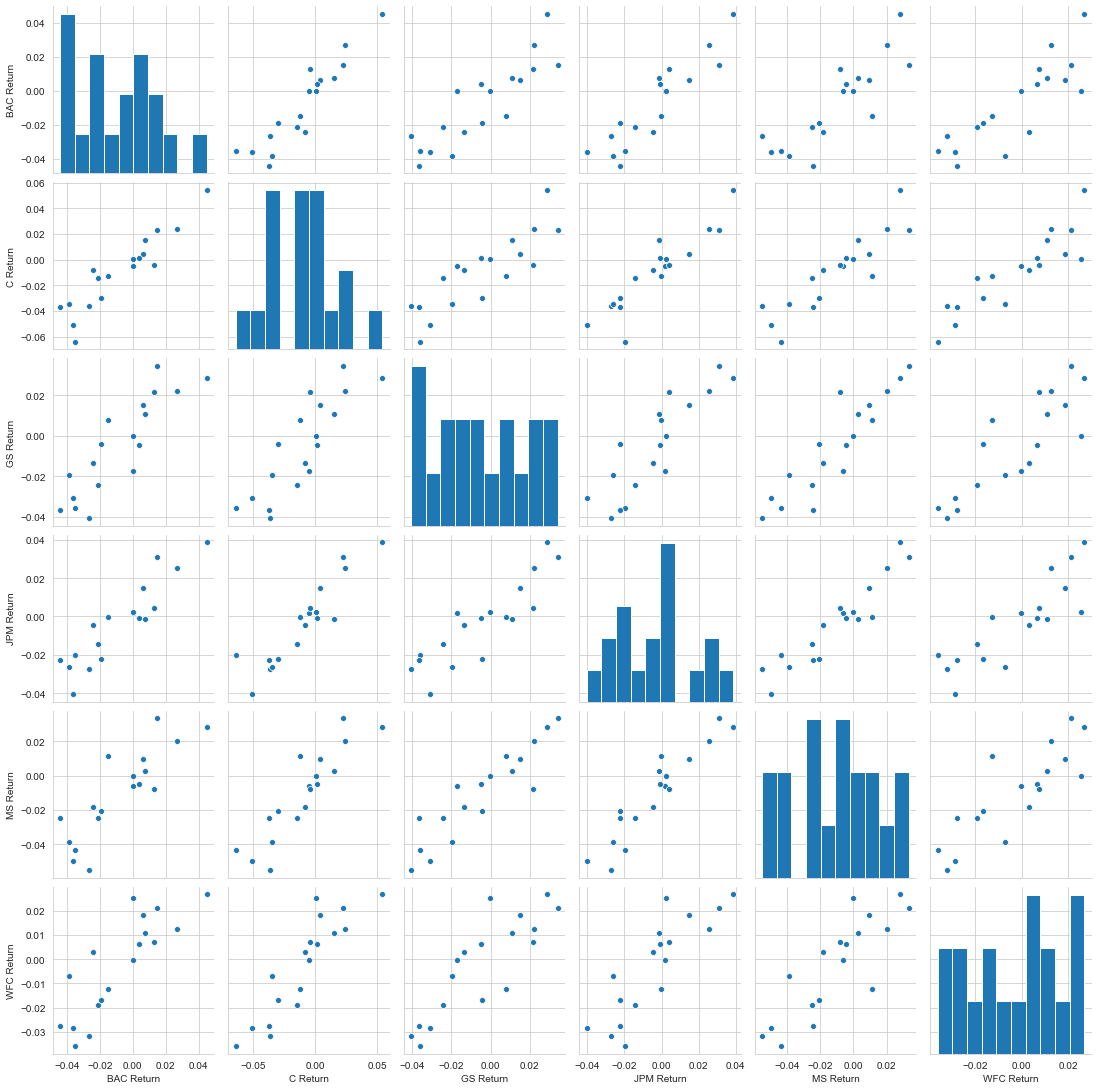

In [13]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [14]:
returns.idxmin()

BAC Return   2016-01-25
C Return     2016-01-15
GS Return    2016-01-13
JPM Return   2016-01-07
MS Return    2016-01-13
WFC Return   2016-01-15
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [15]:
returns.idxmax()

BAC Return   2016-01-29
C Return     2016-01-29
GS Return    2016-01-22
JPM Return   2016-01-29
MS Return    2016-01-22
WFC Return   2016-01-29
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [16]:
returns.std() 

BAC Return    0.024798
C Return      0.029260
GS Return     0.023836
JPM Return    0.021500
MS Return     0.026138
WFC Return    0.020455
dtype: float64

In [18]:
returns.loc['2016-01-01':'2016-01-31'].std()

BAC Return    0.024798
C Return      0.029260
GS Return     0.023836
JPM Return    0.021500
MS Return     0.026138
WFC Return    0.020455
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

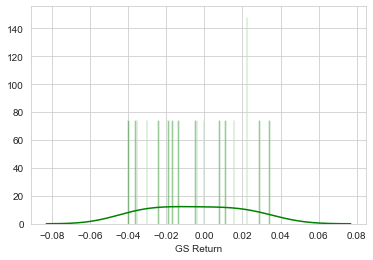

In [19]:
sns.distplot(returns.loc['2016-01-01':'2016-01-31']['GS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

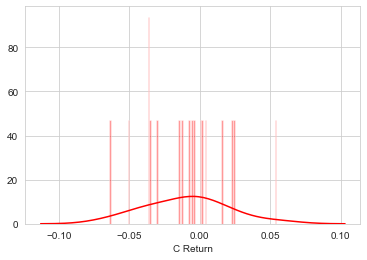

In [20]:
sns.distplot(returns.loc['2016-01-01':'2016-01-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

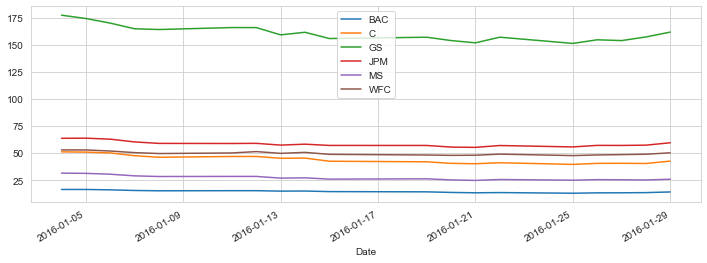

In [22]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

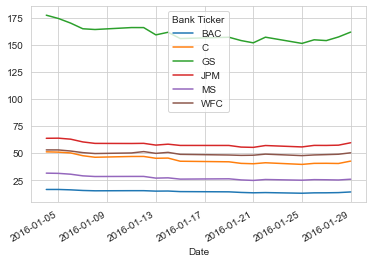

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [24]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

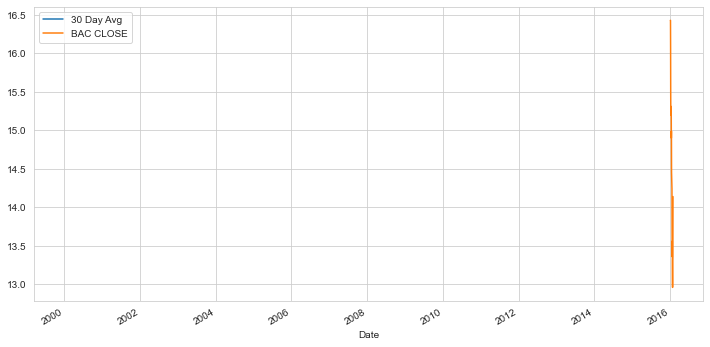

In [25]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2016-01-01':'2016-01-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2016-01-01':'2016-01-31'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

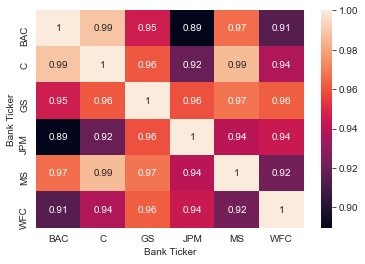

In [26]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

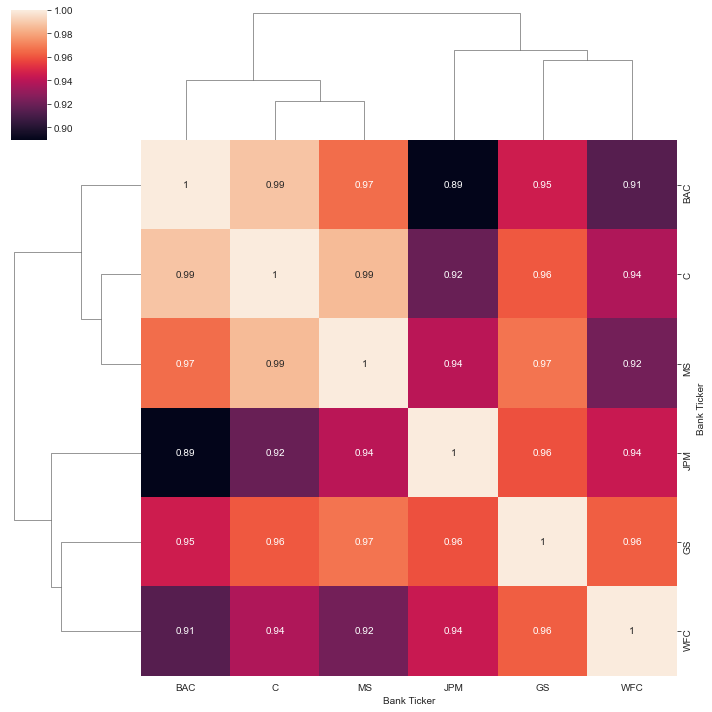

In [27]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [28]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [29]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2016-01-31'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [30]:
MS['Close'].loc['2016-01-01':'2016-01-31'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [31]:
BAC['Close'].loc['2016-01-01':'2016-01-31'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.